In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from itertools import combinations 
from random import seed
from random import randint
import random
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from random import randrange
from csv import reader
import seaborn as sns

In [34]:
#NEURAL NETWORKS
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_k(x,k):
    return 1 / (1 + k*np.exp(-z))

In [35]:
def relu(x):
    return np.log(1+np.exp(x))


In [36]:
def loss(out,Y):
        loss = (-1)*(np.sum(np.multiply(np.log(out), Y) + np.multiply((1 - Y), np.log(1 - out))))/(Y.shape[1])
        #print(loss)
        return loss
    
def loss1(out,Y):
        loss_1 = np.sum((out-Y)**2)
        #print(loss)
        return loss_1

In [37]:
def ann(X,Y,learning_rate):
    #taking all 9 layers as input
    in_layer_no=X.shape[0] #no of attributes
    hid_layer_no=int((2/3)*in_layer_no)
    out_layer_no=1

    #initial weights
    wh = np.random.randn(hid_layer_no,in_layer_no) * 0.01
    bh = np.zeros(shape=(hid_layer_no, 1))
    w_out = np.random.randn(out_layer_no,hid_layer_no) * 0.01
    b_out = np.zeros(shape=(out_layer_no, 1))
    bh=0
    b_out=0
    initial_weights=[wh,bh,w_out,b_out]
    dwh_old=0
    dw_out_old=0
    for i in range(0,50000):
        #forward propogation
        #input to hidden layer = dot product(X,wh) + bh
        hid_layer_input = np.dot(wh,X) + bh
        hid_layer_act = sigmoid(hid_layer_input)
        
        # Final output layer prediction
        out_layer_input = np.dot(w_out,hid_layer_act) + b_out
        out_layer_act = sigmoid(out_layer_input)
        lo=loss1(out_layer_act,Y)
        if(i%10000==0):
            print(i,lo)
        #print("w_out",w_out.shape,"wh",wh.shape,"out act",out_layer_act.shape,"out before act",out_layer_input.shape,"hid act",hid_layer_act.shape,"hid before act",hid_layer_input.shape)
        #backward propogation output layer    
            #(tj-oj *oj* 1-oj)
        t_o = out_layer_act - Y
        sigmak = t_o * out_layer_act*(1-out_layer_act)  
            # sigmak* Xji
        loss_wout = (1/hid_layer_act.shape[1]) * np.dot(sigmak,hid_layer_act.T)
        loss_bout = (1/hid_layer_act.shape[1]) * np.dot(sigmak, np.ones([sigmak.shape[1],1])) 
          
        #backward propogation hidden layer
            # wkj*sigmak
        loss_hid_layer_act = np.dot(w_out.T,sigmak)
            # sigmaj= wkj*sigmak*oj*1-oj
        loss_hid_layer_input = loss_hid_layer_act * hid_layer_act*(1-hid_layer_act)   
            #  loss wh =  wkj*sigmak*oj*1-oj*Xij
        loss_wh = 1/X.shape[1] * np.dot(loss_hid_layer_input,X.T)
        loss_bh = 1/X.shape[1] * np.dot(loss_hid_layer_input, np.ones([loss_hid_layer_input.shape[1],1]))  
        
        wh = wh - learning_rate * loss_wh
        w_out = w_out - learning_rate * loss_wout
        bh = bh - learning_rate * loss_bh
        b_out = b_out - learning_rate * loss_bout
    return [wh,bh,w_out,b_out]
        

In [38]:
#final forward propogation to test trained model 
def predict_ann(XTrain,YTrain,XTest,YTest,learning_rate):
    final_weights=ann(XTrain,YTrain,learning_rate)
    hid_layer_input = np.dot(final_weights[0],XTest) + final_weights[1]
    hid_layer_act = relu(hid_layer_input)
    out_layer_input = np.dot(final_weights[2],hid_layer_act) + final_weights[3]
    out_layer_act = sigmoid(out_layer_input)
    predictions = out_layer_act > 0.5
    predictions=predictions.astype(int)
    #print(type(predictions),predictions.shape)
    accuracy=float((np.dot(YTest,predictions.T) + np.dot(1-YTest,1-predictions.T))/float(YTest.size)*100)
    #print(accuracy)
    #print ('Accuracy: %f' % float((np.dot(YTest,predictions.T) + np.dot(1-YTest,1-predictions.T))/float(YTest.size)*100) + '%')
    return [accuracy,predictions]

In [39]:
def split_test_train(XTrain,XTest,YTrain,YTest):
    #print(X.shape,Y.shape)
    #X,Y=X.to_numpy(),Y.to_numpy()
    XTrain,XTest,YTrain,YTest= XTrain.to_numpy().T,XTest.to_numpy().T,YTrain.to_numpy().reshape(1, YTrain.shape[0]),YTest.to_numpy().reshape(1, YTest.shape[0])
    #X,Y=X.T,Y.reshape(1, Y.shape[0])
    #print(X.shape,Y.shape,XTrain.shape,YTrain.shape,XTest.shape,YTest.shape)
    res=predict_ann(XTrain,YTrain,XTest,YTest,0.05)
    return res

In [40]:
#ATTRIBUTE BAGGING WITH ANN
#functions for creating all possible combinations of subsets of size r 
def rSubset(arr,r): 
    return list(combinations(arr, r)) 
def comb(r):
    arr = [1,2,3,4,5,6,7,8,9] 
    return(rSubset(arr, r))

#Function that finds and returns accuracy and confusion matrix of each subset size of attributes
def att_bagg(r,XTrain,XTest,YTrain,YTest):
    s=comb(r)
    length=len(s)
    inner_acc=[]
    #repeat 3 times
    for i in range(0,3):
        if(r==9):
            res=split_test_train(XTrain,XTest,YTrain,YTest)
            ytemp_test=YTest.to_numpy().reshape(1, YTest.shape[0])
            return confusion_matrix(ytemp_test[0],res[1][0]),res[0]
        #choosing 5 random subsets from the list of all possible combinations
        rand_index=random.sample(range(0, length), 5)
        l=[]
        for j in rand_index:
            t=s[j]
            #creating a dataset with attributes in that particular subset combination for train and test
            new_dataset_train = XTrain.loc[:,list(t)]
            new_dataset_test=XTest.loc[:,list(t)]
            #getting acc,predictions and append to list
            res=split_test_train(new_dataset_train,new_dataset_test,YTrain,YTest)
            l.append(res)
        #sort the list and pick only top 3 and making it a list
        l.sort(key=lambda x:x[0],reverse=True)
        top=l[0:3]
        top=list(map(lambda x: [x[0],x[1][0].tolist()],top))
        votes=list(zip(top[0][1],top[1][1],top[2][1]))
        #counting max votes for classification to find final predictions 
        final_predictions=list(map(lambda x:max(set(list(x)), key = list(x).count),votes))
        temp=[]
        temp.append(final_predictions)
        final_predictions=np.asarray(temp)
        ytemp_test=YTest.to_numpy().reshape(1, YTest.shape[0])  
        #acc=(TN+TP)/TOTAL
        accuracy=float((np.dot(ytemp_test,final_predictions.T) + np.dot(1-ytemp_test,1-final_predictions.T))/float(ytemp_test.size)*100)
        inner_acc.append([accuracy,final_predictions])
    ytemp_test=YTest.to_numpy().reshape(1, YTest.shape[0])
    #taking the median accuracy out of the top 3 selected after sorting by accuracy
    inner_acc.sort(key=lambda x:x[0],reverse=True)
    final_bag=inner_acc[1]
    return confusion_matrix(ytemp_test[0], final_bag[1][0]),final_bag[0]


In [41]:
#reading and converting data into pandas dataframe
with open('breast-cancer.data') as input_file:
    lines = input_file.readlines()
    #print(lines)
    newLines = []
    for line in lines:
        newLine = line.strip().split(",")
        #print(newLine)
        newLines.append(newLine)
df = pd.DataFrame(newLines) 


In [42]:
#reading of the preprocessed dataset

df[10].replace(['2', '4'], [0, 1], inplace=True)

#preprocessing

#dealing with missing values
df[6].value_counts()
#16 instances of ? is observed
#replacing these ? with median of the columns
#med=df['barenuclei'].median()
df[6] = df[6].replace('?', 0)
med=df[6].median()
df[6] = df[6].replace('?', med)

df = df.astype(float)
#normalizations
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

df.columns=[0,1,2,3,4,5,6,7,8,9,10]
#finding X(attributes excluding Target) and Y(Target)
Y = df.filter([10], axis=1)
X = df.drop([0,10],axis=1)
XTrain,XTest,YTrain,YTest=train_test_split(X, Y, test_size=0.25, random_state=42)

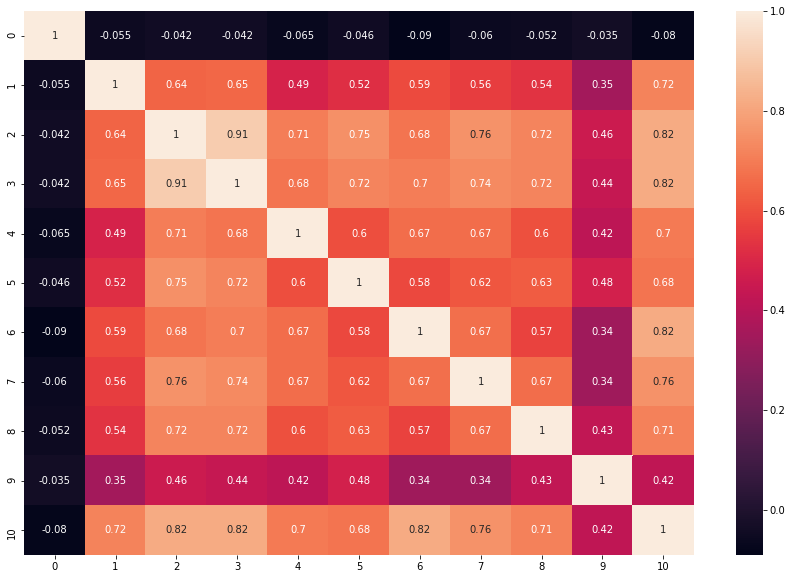

In [89]:
#VISUALISATION
#correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [43]:
#attribute bagging
total=[]
#from 2 to 9 attribute range
#finding accuracy for each attribute subset size and corresponding accuracy
for i in range(2,10):
    conf_mat,acc=att_bagg(i,XTrain,XTest,YTrain,YTest)
    total.append(acc)
    print(conf_mat)

0 131.020324828152
10000 36.75566217345373
20000 19.111858791444384
30000 16.98733817099977
40000 16.28119160560501
0 130.8027545364452
10000 67.3697754813544
20000 34.914721993657174
30000 30.765145894497902
40000 29.35313177309847
0 130.98730775341255
10000 51.118918981844764
20000 26.460748338585375
30000 23.61654558915796
40000 22.655139759627428
0 131.25125789525742
10000 86.76883052118492
20000 43.193122529540375
30000 37.48586245980364
40000 35.759389929268835
0 131.28155639844857
10000 74.21980404080401
20000 30.81676303986547
30000 26.075119850563038
40000 24.67286881657985
0 130.97302896060464
10000 56.173747048412636
20000 28.01166437178393
30000 24.88571477598974
40000 23.85004457142554
0 131.08724574740972
10000 57.821669469586276
20000 31.158174928466124
30000 27.936183507337148
40000 26.855011181958183
0 130.96557378189277
10000 101.88332300440854
20000 58.1974368054168
30000 51.708669551200416
40000 50.10594349964049
0 130.9379875440934
10000 64.54831838340533
20000 28.

0 131.2895495343349
10000 21.80317915771451
20000 13.663749569603201
30000 12.364157247321698
40000 11.876405924547571
0 130.63799425284364
10000 27.113678812299682
20000 19.127486176632654
30000 17.728390714718124
40000 17.158172976910702
0 131.00199052627875
10000 22.503677706666537
20000 15.761804670667942
30000 14.57185446184969
40000 14.032060001807453
0 131.10354141896423
10000 21.98582382960474
20000 16.280487504023704
30000 15.31376145398508
40000 14.89087651515258
0 131.07317718220975
10000 25.404891486471655
20000 16.302893104537752
30000 14.811527059081177
40000 14.181202279896429
0 131.03156012538415
10000 21.56586578325404
20000 14.217075295709993
30000 12.922287919365047
40000 12.379316554104832
0 130.75855423364
10000 20.44000133273596
20000 14.384740736454567
30000 13.352537439479645
40000 12.933856150885195
[[115   3]
 [  3  54]]
0 131.205932141454
10000 21.228145346089985
20000 13.970132921747851
30000 12.668408977963317
40000 12.12102937120298
0 130.74053582838752
10

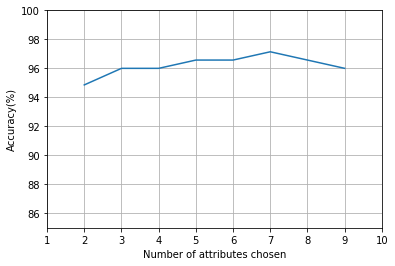

In [44]:
#graph of accuracy vs attribute subset size
keys=[2,3,4,5,6,7,8,9]
dictionary = dict(zip(keys, total))
plt.plot(*zip(*sorted(dictionary .items())))
plt.xlim(1,10)
plt.ylim(85,100)
plt.xlabel('Number of attributes chosen')
plt.ylabel('Accuracy(%)')
plt.grid()
plt.show()

In [52]:
total

[94.85714285714286,
 96.0,
 96.0,
 96.57142857142857,
 96.57142857142857,
 97.14285714285714,
 96.57142857142857,
 96.0]

In [ ]:
#RANDOM FOREST

In [45]:
def get_split(dataset, n_features):
    class_mid = set(row [-1] for row in dataset)
    classes = list(class_mid)
    opt_index, opt_value, opt_score, opt_groups = 999, 999, 999, None
    feat = list()
    while (len(feat) < n_features):
        col = randrange(len(dataset[0])-1)
        if col not in feat:
            feat.append(col)
    for col in feat:
        for row in dataset:
            groups = split_test(col, row[col], dataset)
            n_instances = 0 
            count = 0
            #finding gini index 
            for group in groups:
                n_instances = float(n_instances + len(group))
            gini_val_mid = 0.0
            for group in groups:
                size = int(len(group))
                if(size==0):
                    continue
                score = 0.0
                for class_val in classes:
                    for row in group:
                        if (row[-1] == class_val):
                            count = count + 1 
                g = count / size 
                score = score + (g*g)
                gini_val_mid = gini_val_mid + (1.0 - score)* (size/ n_instances)
            gini_val = gini_val_mid 
            #gets optimal column to split and the point at which column should be split 
            if(gini_val < opt_score):
                opt_index, opt_value, opt_score, opt_groups = col, row[col], gini_val, groups
        return {'index':opt_index, 'value':opt_value, 'groups':opt_groups}

In [46]:
#To calculate the groups for the proposed split in data
def split_test(index, value, dataset):
    left = []
    right = []
    groups = []
    for col in dataset:
        if col[index] < value:
            left.append(col)
        else:
            right.append(col)
    groups.append(left)
    groups.append(right)
    return groups

In [47]:
#to get splits of the data 
def create_tree(node, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    if not left or not right:
        #to get the most probable class of the terminal node
        outcomes = [row[-1] for row in (left+right)]
        node['left'] = node['right'] = max(set(outcomes), key = outcomes.count)
        return
    if( len(left) <= min_size):
        #to get the most probable class of the terminal node
        outcomes = [row[-1] for row in left]
        node['left'] = max(set(outcomes), key = outcomes.count)
    else:
        node['left'] = get_split(left, n_features)
        #split the node future 
        create_tree(node['left'], min_size, n_features, depth+1)
    if( len(right) <= min_size):
        #to get the most probable class of the terminal node
        outcomes = [row[-1] for row in (left+right)]
        node['right'] = max(set(outcomes), key = outcomes.count)
    else:
        node['right'] = get_split(right, n_features)
        #split the node future
        create_tree(node['right'], min_size, n_features, depth+1)

In [48]:
def random_forests(train, test, min_size, n_trees, n_features):
    forest = list()
    predictions =  []
    #Creating trees 
    for i in range(n_trees):
        tree = get_split(train, n_features)
        create_tree(tree, min_size, n_features, 1)
        forest.append(tree)
    #Testing the trees  
    for row in test:
        predictions_mid = []
        for tree in forest:
            prediction = predict_rn(tree,row)
            predictions_mid.append(prediction)
        max_prediction = max(set(predictions_mid), key = predictions_mid.count)
        prediction = max_prediction
        predictions.append(prediction)
    return(predictions)

In [49]:
#traversing the trees to predict the otucome to for the give test row 
def predict_rn(node, row):
    if(row[int(node['index'])] < node['value']):
        if isinstance(node['left'], dict):
            return predict_rn(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict_rn(node['right'], row)
        else:
            return node['right']

In [50]:
def evaluation_algorithm(dataset,  n_folds, min_size, n_trees, n_features):
    #splitting the data into folds 
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for j in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    folds = dataset_split
    scores = list()
    #creating test and train datasets
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            #row_copy[-1] = 0
            row_copy[-1] = None
        #getting the predictions for the algorithm 
        predicted = random_forests(train_set, test_set, min_size, n_trees, n_features)
        #print(predicted)
        actual = list()
        for row in fold:
            actual.append(row[-1])
        accuracy = accuracy_score(actual, predicted)
        accuracy = accuracy *100
        scores.append(accuracy)
    return scores

Trees: 1
Mean Accuracy: 95.43%
Trees: 2
Mean Accuracy: 95.00%
Trees: 3
Mean Accuracy: 95.14%
Trees: 4
Mean Accuracy: 95.00%
Trees: 5
Mean Accuracy: 95.43%
Trees: 6
Mean Accuracy: 96.57%
Trees: 7
Mean Accuracy: 95.57%
Trees: 8
Mean Accuracy: 95.71%
Trees: 9
Mean Accuracy: 95.43%
Trees: 10
Mean Accuracy: 95.43%


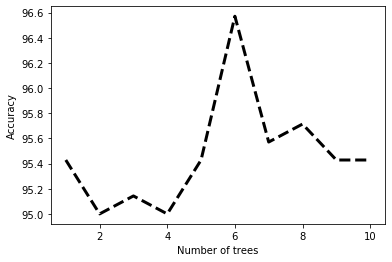

<Figure size 432x288 with 0 Axes>

In [68]:
#main function for random forest
if __name__ == "__main__":
    dataset =[] 
    dataset.append(['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    for i in range((df.shape[0])): 
        p=list(df.iloc[i, :])
        p.insert(0,i)
        p=list(map(lambda x:str(x),p))
        dataset.append(p) 
    fold_size = 7
    min_termination_size = 1
    sum_scores = 0.0
    n_features = int((len(dataset[0])-1)/2)
    n_trees = 1
    score = []
    #n_trees_list = [1]
    #n_trees_list = [1,3,5]
    n_trees_list = [1,2,3,4,5,6,7,8,9,10]
    mean_accuracies = list()
    for n_trees in n_trees_list:
        scores = evaluation_algorithm(dataset,fold_size, min_termination_size, n_trees, n_features)
        print('Trees: %d' % n_trees)
        for score in scores:  
            sum_scores = sum_scores + score
        mean_accuracy = (sum_scores/7)
        mean_accuracies.append(mean_accuracy)
        sum_scores = 0 
        print('Mean Accuracy: %.2f%%' % (mean_accuracy))
    plt.plot(n_trees_list, mean_accuracies, color='black', linestyle='dashed', linewidth = 3)
    plt.xlabel('Number of trees')
    plt.ylabel('Accuracy')
    plt.show()
    plt.savefig('random_forest.png')
